EVALUATING THE EFFECTIVENESS OF MACHINE LEARNING METHOD IN MITIGATING BIAS IN RECRUITMENT PROCESSES

IMPORT LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score, recall_score, f1_score
from sklearn.metrics import cohen_kappa_score,roc_auc_score,roc_curve,plot_confusion_matrix,plot_roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

Data Importation

In [2]:
dt = pd.read_csv("recruitment.csv")
dt.head()
# Dropping the 'customerID' column as it's a unique identifier and not useful for modeling
dt = dt.drop('Id', axis=1)

DATA STRUCTURE AND STATISTICAL ANALYSIS

In [3]:
# Previewing the dataseat (using top 10 rows)
dt.head(10)

,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
5,female,26,Dutch,Chess,63,False,False,False,False,1,True,bachelor,A,True
6,female,27,Dutch,Tennis,63,True,True,False,False,2,True,bachelor,A,False
7,female,22,Dutch,Swimming,71,False,True,False,False,1,True,master,A,True
8,female,28,Dutch,Football,65,True,False,False,True,3,False,bachelor,A,False
9,male,24,Dutch,Football,55,True,False,False,True,3,False,master,A,True


In [4]:
# reviewing the 5 buttom rows
dt.tail()

,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
3995,female,28,Dutch,Running,63,False,False,False,False,0,False,master,D,False
3996,female,27,Dutch,Tennis,62,False,False,False,True,2,True,bachelor,D,False
3997,male,24,Belgian,Rugby,60,True,False,False,True,2,False,bachelor,D,False
3998,female,22,Dutch,Tennis,66,False,True,False,False,1,True,bachelor,D,False
3999,male,28,Dutch,Football,58,False,False,False,False,1,False,bachelor,D,False


In [30]:
#Checking the shape of the dataset

dt.shape

(4000, 14)

In [6]:
#Checking the shape of the dataset
dt.size

56000

In [7]:
#Checking for Duplicate values
dt.duplicated().sum()

39

In [8]:
#Getting info about the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 4000 non-null   object
 1   age                    4000 non-null   int64 
 2   nationality            4000 non-null   object
 3   sport                  4000 non-null   object
 4   ind-university_grade   4000 non-null   int64 
 5   ind-debateclub         4000 non-null   bool  
 6   ind-programming_exp    4000 non-null   bool  
 7   ind-international_exp  4000 non-null   bool  
 8   ind-entrepeneur_exp    4000 non-null   bool  
 9   ind-languages          4000 non-null   int64 
 10  ind-exact_study        4000 non-null   bool  
 11  ind-degree             4000 non-null   object
 12  company                4000 non-null   object
 13  decision               4000 non-null   bool  
dtypes: bool(6), int64(3), object(5)
memory usage: 273.6+ KB


In [9]:
# statiscical description 
dt.describe()

,age,ind-university_grade,ind-languages
count,4000.000000,4000.000000,4000.000000
mean,26.179000,62.380000,1.336250
std,2.807477,5.916194,0.854031
min,21.000000,45.000000,0.000000
25%,24.000000,58.000000,1.000000
50%,26.000000,62.000000,1.000000
75%,28.000000,67.000000,2.000000
max,32.000000,78.000000,3.000000


In [10]:
# the list of the column in the dataset
dt.columns

Index(['gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company', 'decision'],
      dtype='object')

In [11]:
#check for missing value
dt.isna().sum()

gender                   0
age                      0
nationality              0
sport                    0
ind-university_grade     0
ind-debateclub           0
ind-programming_exp      0
ind-international_exp    0
ind-entrepeneur_exp      0
ind-languages            0
ind-exact_study          0
ind-degree               0
company                  0
decision                 0
dtype: int64

In [12]:
#Checking hte numbe rof categorical columns in the dataset
cat = dt.select_dtypes(include='object').columns
len(cat)

5

In [13]:
# Calculate acceptance rates by gender
gender_acceptance_rates = dt.groupby('gender')['decision'].mean()

gender_acceptance_rates

gender
female    0.274860
male      0.352609
other     0.301205
Name: decision, dtype: float64

In [14]:
# numerical columns
num = dt.select_dtypes(include=np.number).columns
len(num)

3

In [15]:
#Checking for the unique values in the numerical column
for i in num:
    print("The no.of unique values in",i,"are: ",dt.loc[:,i].nunique())

The no.of unique values in age are:  12
The no.of unique values in ind-university_grade are:  33
The no.of unique values in ind-languages are:  4


In [19]:
dt['gender'].value_counts()

male      2127
female    1790
other       83
Name: gender, dtype: int64

In [20]:
dt['nationality'].value_counts()

Dutch      3167
Belgian     434
German      399
Name: nationality, dtype: int64

In [21]:
dt['sport'].value_counts()

Football    889
Swimming    689
Rugby       675
Tennis      443
Chess       365
Golf        323
Running     309
Cricket     307
Name: sport, dtype: int64

In [22]:
dt['ind-degree'].value_counts()

bachelor    1984
master      1769
phd          247
Name: ind-degree, dtype: int64

In [23]:
dt['company'].value_counts()

A    1000
B    1000
C    1000
D    1000
Name: company, dtype: int64

EXPLORATORY DATA ANALYSIS (EDA)

Value counts and visualisation is used to see the distribution of the data and the interaction between the variables in order to learn more about the data characteristics, patterns, and trends. To do this, univariate and bivariate analysis were performed.

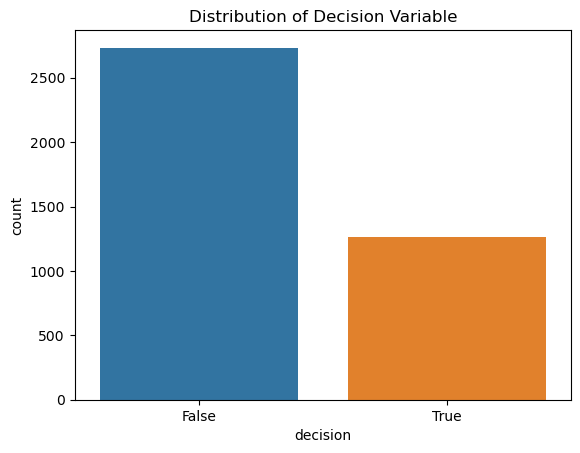

In [24]:
#Distrubution of target variable
sns.countplot(x='decision', data=dt)
plt.title('Distribution of Decision Variable')
plt.show()

Distribution of Numerical Features
Visualize the distribution of numerical features to identify patterns, outliers, or skewness in the data.

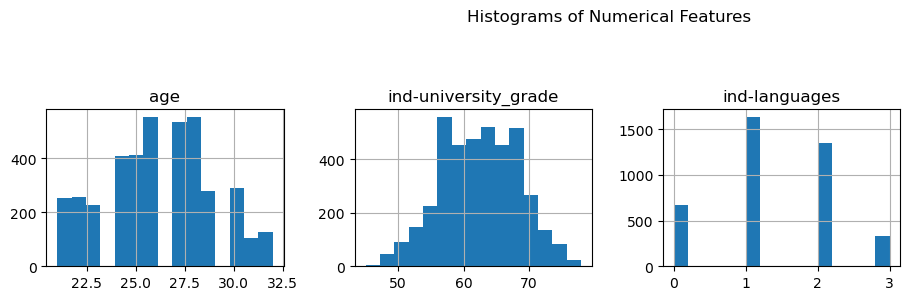

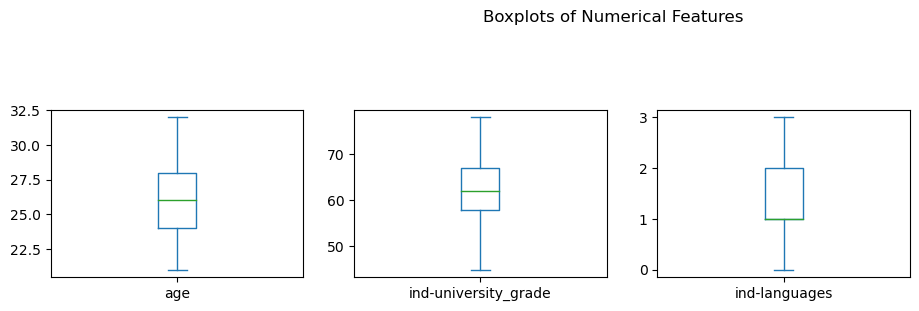

In [25]:
# Distribution of Numerical Features
# Histograms for numerical features
dt.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplots for numerical features
dt.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Boxplots of Numerical Features')
plt.show()


Distribution of Categorical Features
Investigate the distribution of categorical features

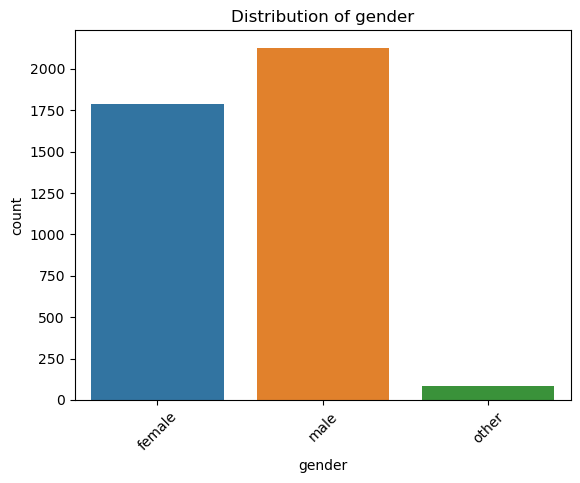

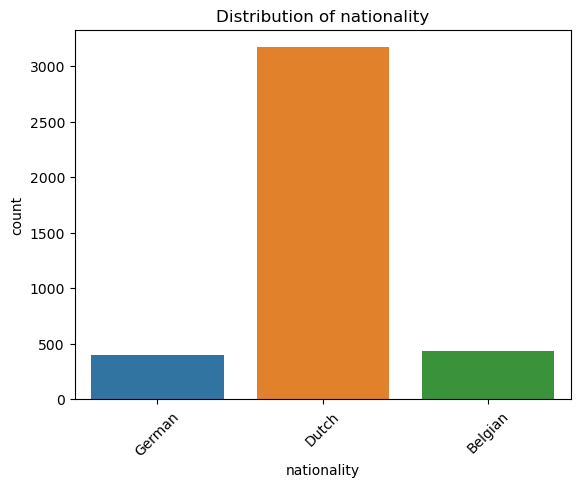

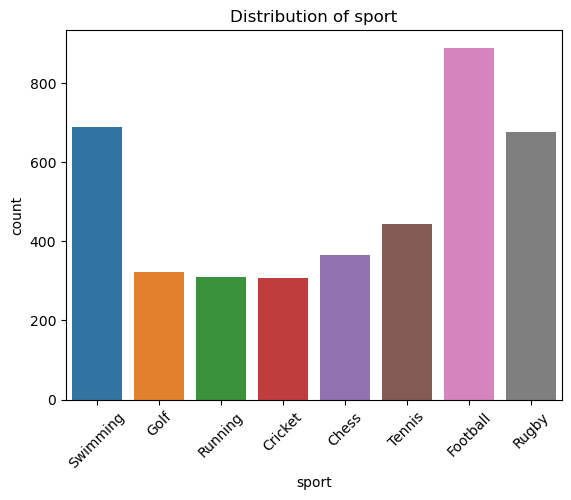

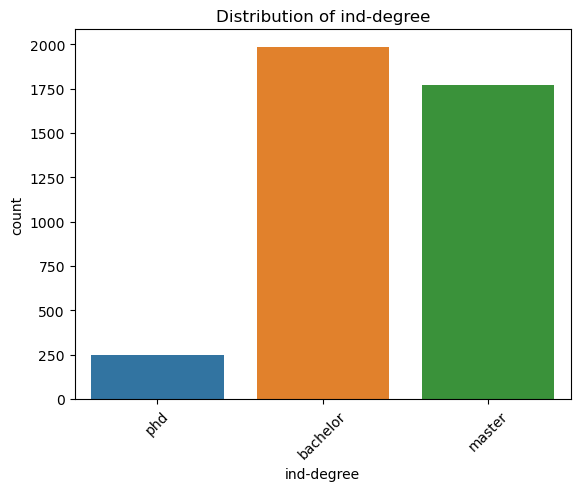

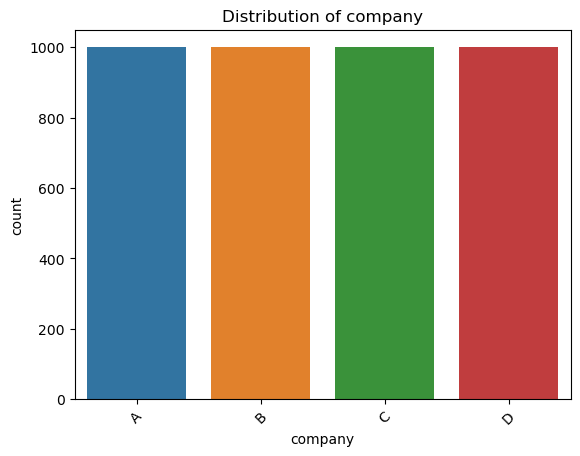

In [26]:
# Bar charts for categorical features
categorical_features = dt.select_dtypes(include=['object', 'category']).columns
for col in categorical_features:
    sns.countplot(x=col, data=dt)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


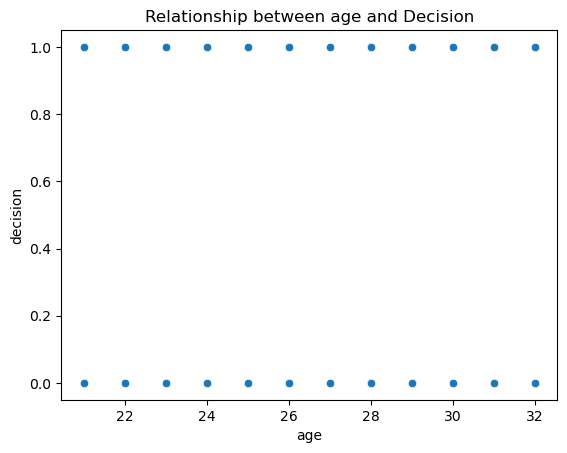

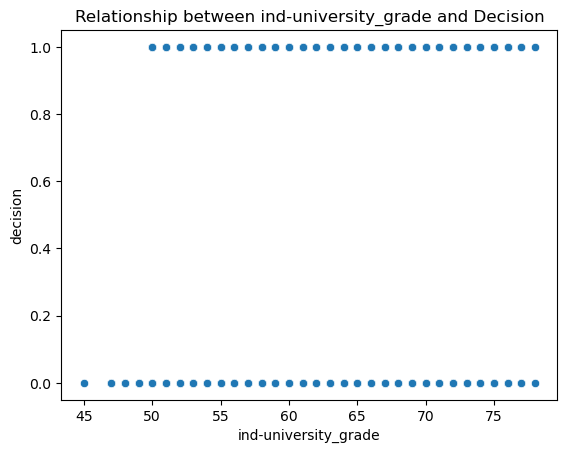

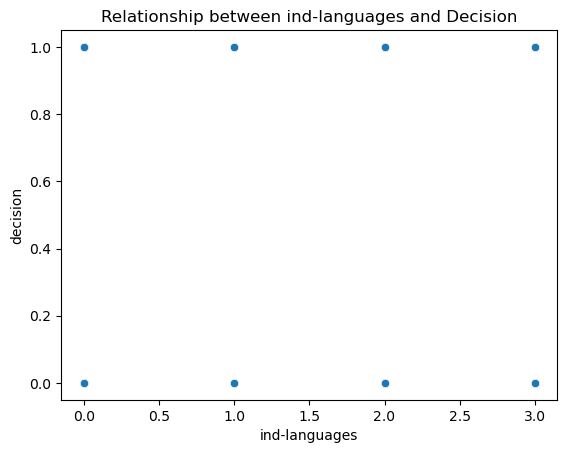

In [27]:
# Scatter plots for continuous variables  categorical variables
numerical_features = dt.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_features:
    sns.scatterplot(x=col, y='decision', data=dt)
    plt.title(f'Relationship between {col} and Decision')
    plt.show()


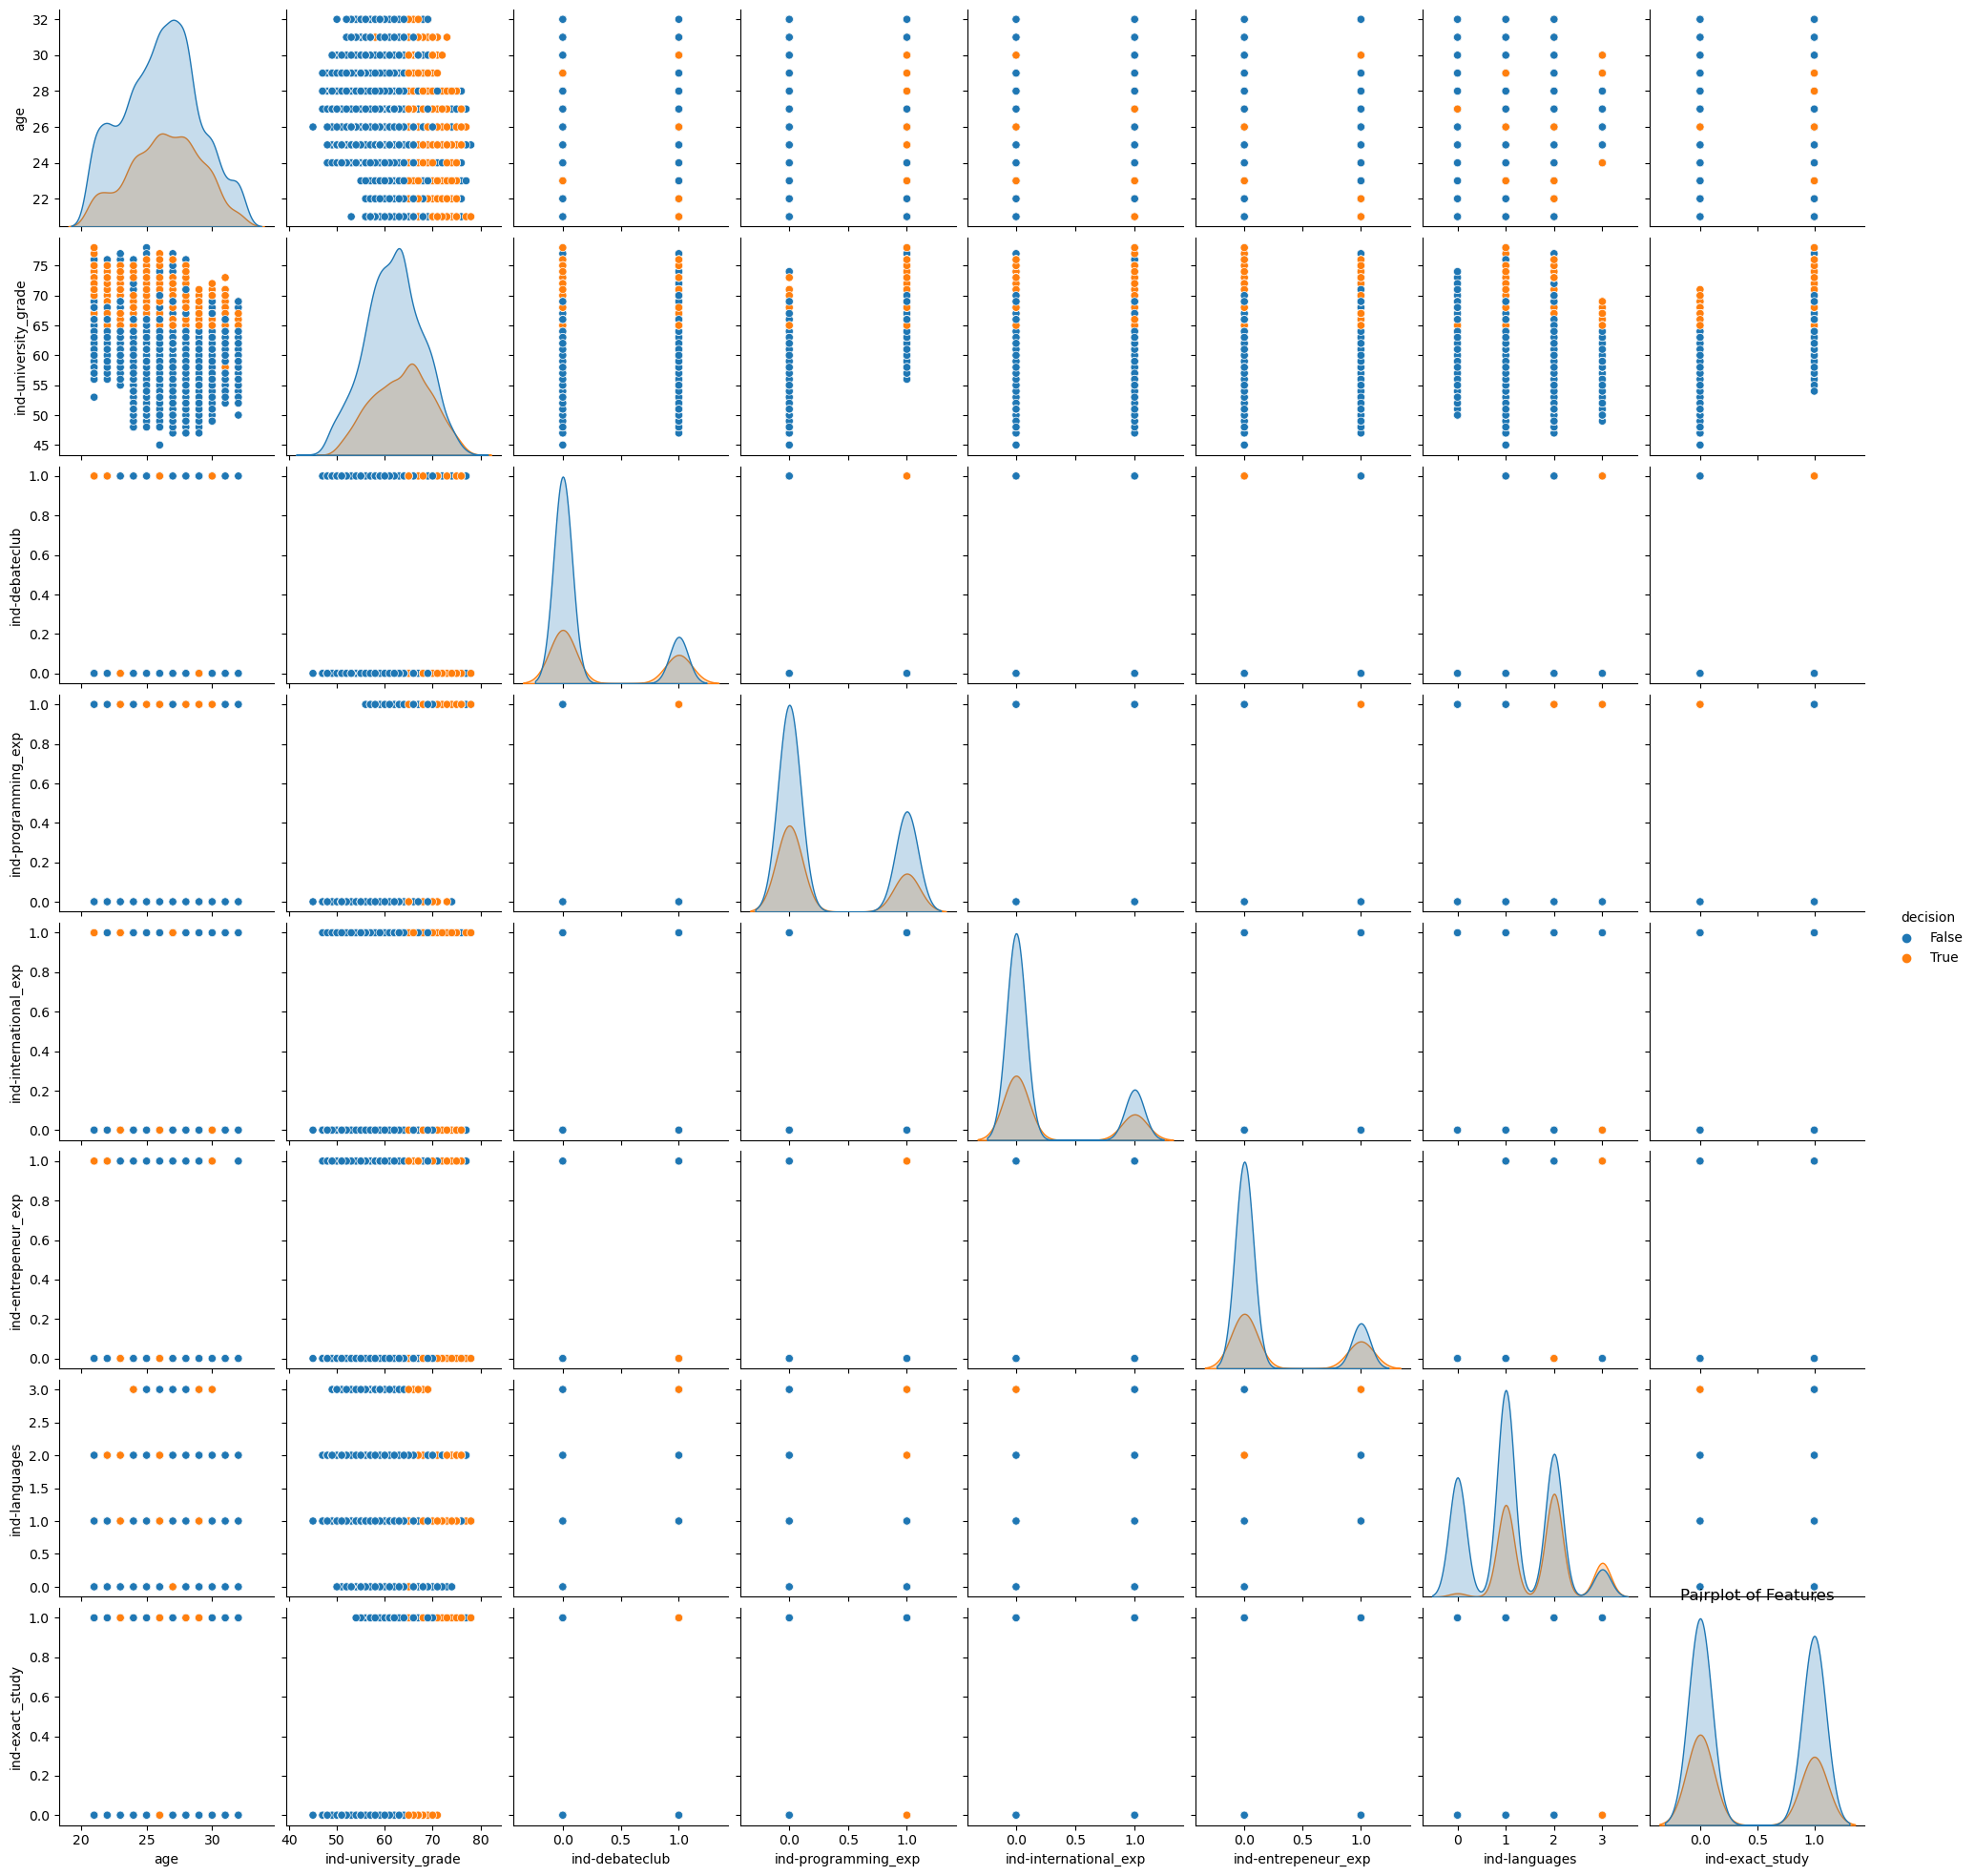

In [28]:
# Pairplot to visualize the relationships
sns.pairplot(dt, hue='decision')
plt.title('Pairplot of Features')
plt.show()


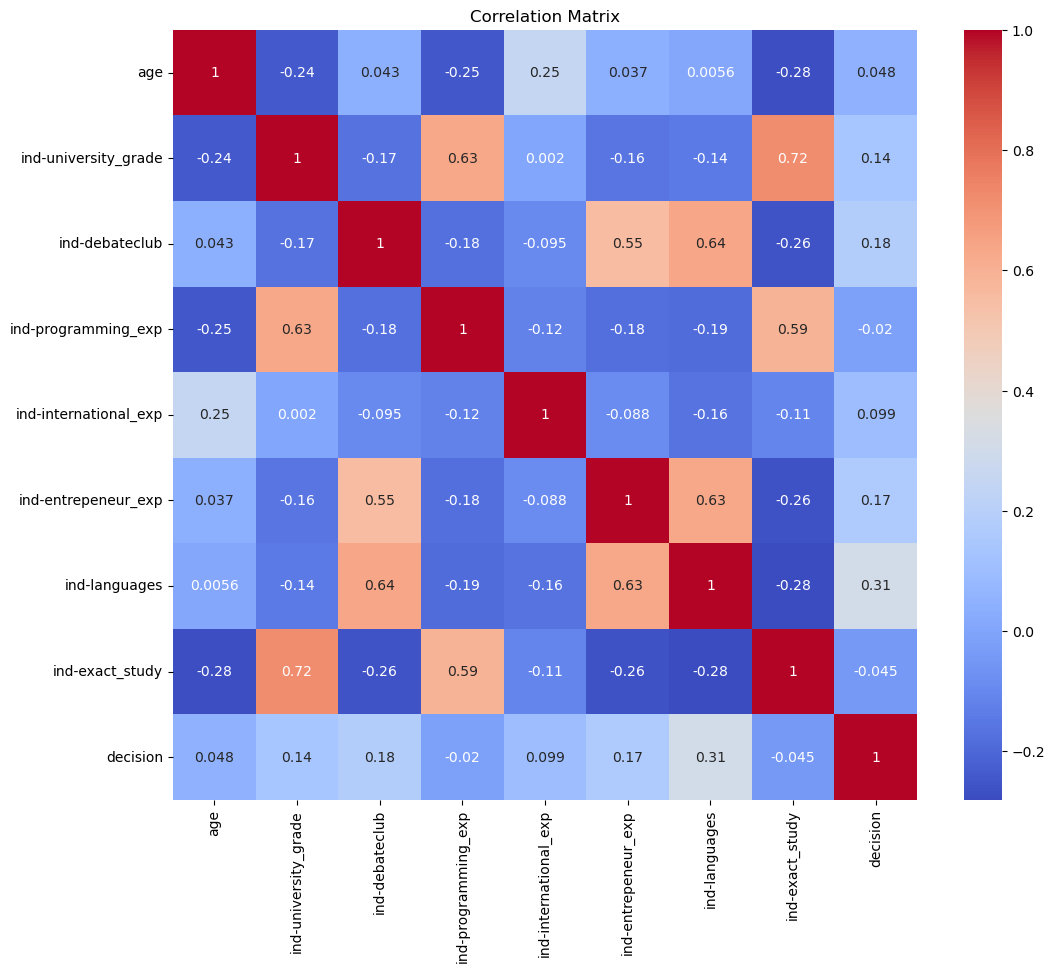

In [31]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(dt.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [32]:
dt.dtypes

gender                   object
age                       int64
nationality              object
sport                    object
ind-university_grade      int64
ind-debateclub             bool
ind-programming_exp        bool
ind-international_exp      bool
ind-entrepeneur_exp        bool
ind-languages             int64
ind-exact_study            bool
ind-degree               object
company                  object
decision                   bool
dtype: object

DATA PREPARATION

The main goals is to prepare, clean, and ready the data for modelling, how ever, ther are no missing values in the dataset

In [33]:
dt.isnull().sum()

gender                   0
age                      0
nationality              0
sport                    0
ind-university_grade     0
ind-debateclub           0
ind-programming_exp      0
ind-international_exp    0
ind-entrepeneur_exp      0
ind-languages            0
ind-exact_study          0
ind-degree               0
company                  0
decision                 0
dtype: int64

In [34]:
dt.shape

(4000, 14)

In [35]:
dt.dtypes

gender                   object
age                       int64
nationality              object
sport                    object
ind-university_grade      int64
ind-debateclub             bool
ind-programming_exp        bool
ind-international_exp      bool
ind-entrepeneur_exp        bool
ind-languages             int64
ind-exact_study            bool
ind-degree               object
company                  object
decision                   bool
dtype: object

In [36]:
# Convert categorical columns to numerical
categorical_columns = dt.select_dtypes(include=['object', 'bool']).columns
# Convert categorical columns to numerical using Label Encoder
for column in categorical_columns:
    le = LabelEncoder()
    dt[column] = le.fit_transform(dt[column])

In [37]:
# Checking data types after encoding
dt.dtypes

gender                   int32
age                      int64
nationality              int32
sport                    int32
ind-university_grade     int64
ind-debateclub           int64
ind-programming_exp      int64
ind-international_exp    int64
ind-entrepeneur_exp      int64
ind-languages            int64
ind-exact_study          int64
ind-degree               int32
company                  int32
decision                 int64
dtype: object

In [38]:
# Checking head of dataset after Encoding
dt.head(n=10)

,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,0,24,2,6,70,0,0,0,0,1,1,2,0,1
1,1,26,2,3,67,0,1,0,0,2,1,0,0,0
2,0,23,1,5,67,0,1,1,0,0,1,1,0,0
3,1,24,1,1,70,0,1,0,0,1,1,1,0,1
4,0,26,2,3,59,0,0,0,0,1,0,1,0,1
5,0,26,1,0,63,0,0,0,0,1,1,0,0,1
6,0,27,1,7,63,1,1,0,0,2,1,0,0,0
7,0,22,1,6,71,0,1,0,0,1,1,1,0,1
8,0,28,1,2,65,1,0,0,1,3,0,0,0,0
9,1,24,1,2,55,1,0,0,1,3,0,1,0,1


In [39]:
# Checking missing columns in dataset
dt.isnull().sum()

gender                   0
age                      0
nationality              0
sport                    0
ind-university_grade     0
ind-debateclub           0
ind-programming_exp      0
ind-international_exp    0
ind-entrepeneur_exp      0
ind-languages            0
ind-exact_study          0
ind-degree               0
company                  0
decision                 0
dtype: int64

In [40]:
# Checking duplicates from dataset
dt.duplicated().sum()

39

In [41]:
#Removing Duplicates from dataset
dt.drop_duplicates(inplace=True)

In [42]:
# Checking duplicates from dataset after removing duplicates
dt.duplicated().sum()

0

In [43]:
print(dt.columns)

Index(['gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company', 'decision'],
      dtype='object')


SHUFFLING THE DATA BEFORE SLITTNG FOR TRAINING AND TESTING

In [44]:
# shufffle the data before spliting
dt= shuffle(dt, random_state=42)

In [45]:
#Splitting the dataset into features (X) and target variable (Y)
X = dt.drop(columns=['decision'], axis=1)
Y = dt["decision"]

In [46]:
X.head()

,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company
149,1,27,1,1,67,0,0,1,1,1,0,1,0
1035,1,25,2,5,60,0,0,0,0,1,0,0,1
1298,1,27,1,7,62,1,0,1,0,2,0,2,1
723,1,25,2,6,66,1,0,1,1,3,0,1,0
325,0,22,1,6,71,0,1,0,0,1,1,1,0


In [47]:
Y

149     1
1035    0
1298    1
723     1
325     0
       ..
1140    0
1304    0
866     1
3535    0
3201    1
Name: decision, Length: 3961, dtype: int64

In [48]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


# Checking the shape of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (3168, 13)
Shape of X_test: (793, 13)
Shape of Y_train: (3168,)
Shape of Y_test: (793,)


In [49]:
X_train.head()

,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company
2677,1,24,0,7,62,1,0,0,0,3,0,0,2
1611,0,28,0,4,52,0,0,0,0,2,0,0,1
1365,1,21,1,6,67,0,1,0,0,1,1,0,1
3422,1,29,2,4,52,0,0,0,0,2,0,1,3
1723,1,24,1,4,54,0,0,1,1,2,0,1,1


In [50]:
gender_counts = X_train['gender'].value_counts()

print("gender Counts in X_train:")
print(gender_counts)

gender Counts in X_train:
1    1686
0    1422
2      60
Name: gender, dtype: int64


NORMALIZATION 

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Convert the scaled arrays back to DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Display the first few rows of the scaled training data to see how the features were normalized
print("Scaled Training Data:")
print(X_train.head())

# Display the first few rows of the scaled testing data to see how the features were normalized
print("\nScaled Testing Data:")
print(X_test.head())

Scaled Training Data:
   gender       age  nationality     sport  ind-university_grade  \
0     0.5  0.272727          0.0  1.000000              0.515152   
1     0.0  0.636364          0.0  0.571429              0.212121   
2     0.5  0.000000          0.5  0.857143              0.666667   
3     0.5  0.727273          1.0  0.571429              0.212121   
4     0.5  0.272727          0.5  0.571429              0.272727   

   ind-debateclub  ind-programming_exp  ind-international_exp  \
0             1.0                  0.0                    0.0   
1             0.0                  0.0                    0.0   
2             0.0                  1.0                    0.0   
3             0.0                  0.0                    0.0   
4             0.0                  0.0                    1.0   

   ind-entrepeneur_exp  ind-languages  ind-exact_study  ind-degree   company  
0                  0.0       1.000000              0.0         0.0  0.666667  
1                  0

In [53]:
print(X_test['gender'])

0      0.5
1      0.5
2      0.5
3      0.5
4      0.0
      ... 
788    0.5
789    0.5
790    0.0
791    0.5
792    0.0
Name: gender, Length: 793, dtype: float64


In [54]:
X_test.value_counts("gender")

gender
0.5    424
0.0    346
1.0     23
dtype: int64

In [55]:
X_train.head()

,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company
0,0.5,0.272727,0.0,1.000000,0.515152,1.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.666667
1,0.0,0.636364,0.0,0.571429,0.212121,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.333333
2,0.5,0.000000,0.5,0.857143,0.666667,0.0,1.0,0.0,0.0,0.333333,1.0,0.0,0.333333
3,0.5,0.727273,1.0,0.571429,0.212121,0.0,0.0,0.0,0.0,0.666667,0.0,0.5,1.000000
4,0.5,0.272727,0.5,0.571429,0.272727,0.0,0.0,1.0,1.0,0.666667,0.0,0.5,0.333333


In [56]:
X_train.tail()

,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company
3163,0.5,0.636364,1.0,0.857143,0.575758,1.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.666667
3164,0.5,0.090909,0.5,0.714286,0.727273,0.0,1.0,0.0,0.0,0.333333,1.0,0.0,0.000000
3165,0.5,0.636364,1.0,0.285714,0.606061,0.0,0.0,1.0,1.0,0.666667,0.0,1.0,0.333333
3166,0.5,0.727273,0.5,0.285714,0.121212,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.000000
3167,0.0,1.000000,0.5,0.285714,0.606061,0.0,1.0,0.0,0.0,0.333333,1.0,0.0,1.000000


MODEL EVALUATION

RANDOM FOREST CLASSIFIER

In [57]:
# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [58]:
from sklearn import metrics
Y_pred_rf_train = rf_model.predict(X_train)
print("Accuracy on training data: ", metrics.accuracy_score(Y_train, Y_pred_rf_train))
print ("Precision on training data: ", metrics.precision_score(Y_train, Y_pred_rf_train)) 
print ("Recall on training data: ", metrics.recall_score(Y_train, Y_pred_rf_train))

Accuracy on training data:  0.9981060606060606
Precision on training data:  0.9970119521912351
Recall on training data:  0.9970119521912351


In [59]:
Y_pred_rf = rf_model.predict(X_test)
print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, Y_pred_rf))
print ("Precision on testing data: ", metrics.precision_score(Y_test, Y_pred_rf)) 
print ("Recall on testing data: ", metrics.recall_score(Y_test, Y_pred_rf))

Accuracy on testing data:  0.8423707440100883
Precision on testing data:  0.7603305785123967
Recall on testing data:  0.7330677290836654


TN=484, FP=58, FN=67, TP=184


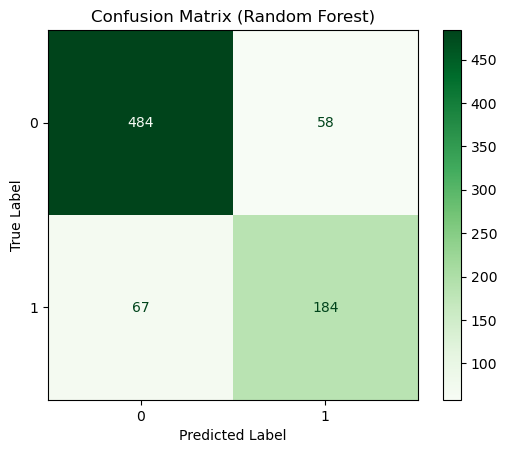

In [60]:
#Display the confusion matrix for your model
cm_RF= metrics.confusion_matrix(Y_test,Y_pred_rf)
TN, FP, FN, TP = cm_RF.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN,FP,FN,TP))
disp_RF = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_RF)
disp_RF.plot(cmap='Greens')  
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [61]:
calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)

Calculated accuracy =  0.8423707440100883
Calculated precision =  0.7603305785123967
Calculated recall =  0.7330677290836654


In [62]:
# Print classification report
print("Random Forest Classification Report:")
print(classification_report(Y_test,Y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       542
           1       0.76      0.73      0.75       251

    accuracy                           0.84       793
   macro avg       0.82      0.81      0.82       793
weighted avg       0.84      0.84      0.84       793



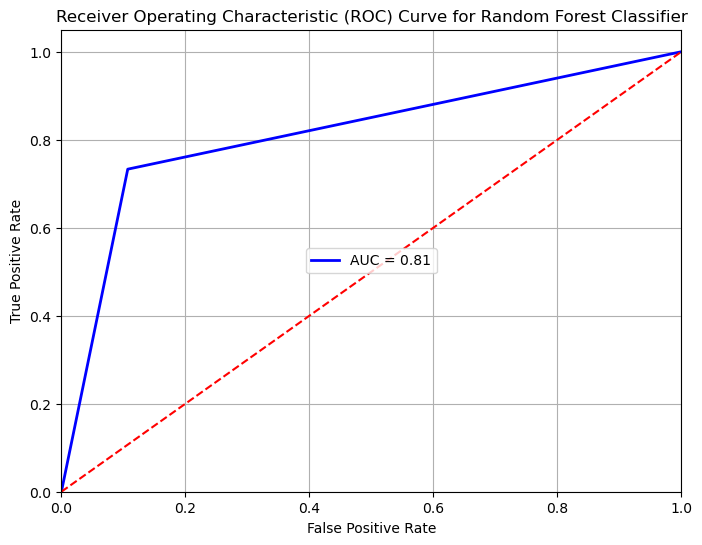

In [63]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_rf)
# Calculate the AUC score
auc_score = roc_auc_score(Y_test, Y_pred_rf)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc='center')
plt.grid(True)
plt.savefig('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier.jpg')
plt.show()

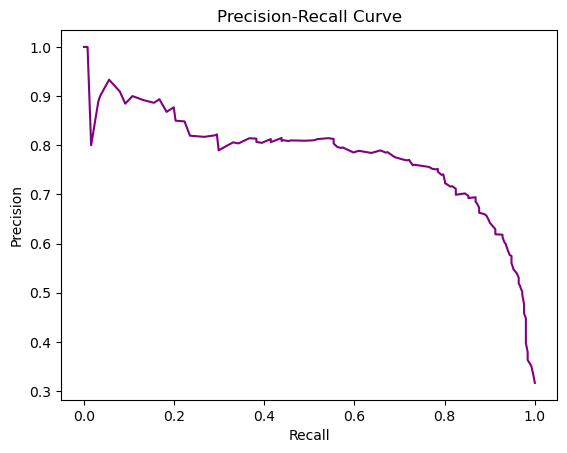

In [64]:
from sklearn.metrics import precision_recall_curve
# Calculate Precision and Recall
precision, recall, thresholds = precision_recall_curve(Y_test, rf_model.predict_proba(X_test)[:, 1])

# Create Precision Recall Curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

# Adding axis labels and title to the plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

# Display plot
plt.savefig('Precision-Recall Curve(Random Forest Classifier).jpg')
plt.show()


FAIRNESS EVALUATION

SPLITTING THE PROTECTED CHARACTERISTIC(GENDER)

In [65]:
PROTECTED = 'gender'

MEN =  0.0 #male 
WOMEN = 0.5 #women
OTHER = 1.0 #other
gender_dist = X_test[PROTECTED].value_counts()
print(gender_dist)
men_indices = np.where(X_test[PROTECTED] == MEN)[0]
women_indices = np.where(X_test[PROTECTED] == WOMEN)[0]
other_indices = np.where(X_test[PROTECTED] == OTHER)[0]
print(men_indices, "No of Men =", men_indices.size)
print(women_indices, "No of Women =", women_indices.size)
print(other_indices, "No of Other =", other_indices.size)

0.5    424
0.0    346
1.0     23
Name: gender, dtype: int64
[  4   6   8   9  10  11  13  15  16  17  19  20  23  27  29  33  35  38
  42  43  45  48  50  51  52  55  56  58  59  65  70  71  73  76  78  79
  83  86  91  93  94  99 101 102 106 108 110 111 114 116 119 120 122 123
 125 126 127 128 133 134 136 138 139 140 141 145 147 152 155 157 158 160
 161 164 166 170 172 176 180 183 184 185 190 191 192 193 194 196 197 198
 199 201 206 209 211 213 215 217 218 220 227 228 229 231 236 239 241 242
 243 244 245 246 247 253 254 255 257 261 262 263 264 265 266 270 271 275
 277 278 279 280 281 283 284 285 288 291 296 298 299 300 301 304 308 311
 314 317 319 323 327 329 330 333 334 335 337 338 341 344 349 358 359 361
 364 365 367 368 369 370 378 379 380 382 383 387 389 391 393 395 396 397
 398 399 404 405 408 410 411 413 415 417 418 424 427 428 431 433 435 436
 437 439 441 443 444 446 450 451 457 461 468 469 475 476 479 485 486 487
 490 493 494 497 499 501 503 506 508 512 514 518 520 529 531 538

TESTING THE PROTECTED CHARACTERISTIC(GENDER)

In [66]:
Y_test_men = [Y_test.values[i] for i in men_indices]
Y_test_women = [Y_test.values[i] for i in women_indices]
Y_test_other = [Y_test.values[i] for i in other_indices]
print(Y_test_men)
print(Y_test_women)
print(Y_test_other)

[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 

In [67]:
Y_predict_men = [Y_pred_rf[i] for i in men_indices]
Y_predict_women = [Y_pred_rf[i] for i in women_indices]
Y_predict_other = [Y_pred_rf[i] for i in other_indices]
print(Y_predict_men)
print(Y_predict_women)
print(Y_predict_other)

[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 

MODEL EVALUATION FOR MEN

TN_m=229, FP_m=20, FN_m=30, TP_m=67


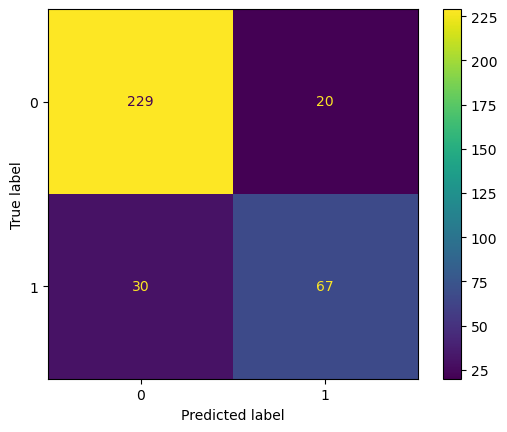

In [68]:
cm_males = metrics.confusion_matrix(Y_test_men, Y_predict_men)
TN_m, FP_m, FN_m, TP_m = cm_males.ravel()
print("TN_m={0}, FP_m={1}, FN_m={2}, TP_m={3}".format(TN_m,FP_m,FN_m,TP_m))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= cm_males)
disp.plot()
plt.show()

In [69]:
accuracy = (TP_m+TN_m)/(TN_m+FP_m+FN_m+TP_m)
recall = (TP_m)/(FN_m+TP_m)
precision = (TP_m)/(TP_m+FN_m)
Positive_Rate = (TP_m+FP_m)/(TP_m+FP_m+TN_m+FN_m)
print("Calculated Accuracy = ", accuracy)
print("Calculated Recall = ", recall)
print("Calculated Precision = ", precision)
print("Calculated Positive Rate = ", Positive_Rate)


Calculated Accuracy =  0.8554913294797688
Calculated Recall =  0.6907216494845361
Calculated Precision =  0.6907216494845361
Calculated Positive Rate =  0.2514450867052023


In [70]:
# Print classification report
print("Random Forest Classification Report:")
print(classification_report(Y_test_men, Y_predict_men))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       249
           1       0.77      0.69      0.73        97

    accuracy                           0.86       346
   macro avg       0.83      0.81      0.81       346
weighted avg       0.85      0.86      0.85       346



MODEL EVALUATION FOR WOMEN

TN_f=242, FP_f=36, FN_f=35, TP_f=111


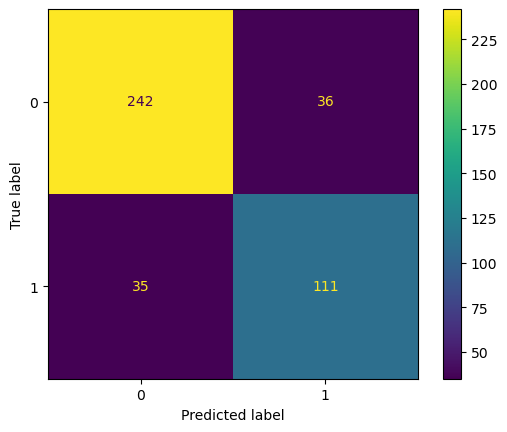

In [71]:
cm_females = metrics.confusion_matrix(Y_test_women, Y_predict_women)
TN_f, FP_f, FN_f, TP_f = cm_females.ravel()
print("TN_f={0}, FP_f={1}, FN_f={2}, TP_f={3}".format(TN_f,FP_f,FN_f,TP_f))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix= cm_females)
disp.plot()
plt.show()

In [72]:
accuracy = (TP_f+TN_f)/(TN_f+FP_f+FN_f+TP_f)
recall = (TP_f)/(FN_f+TP_f)
precision = (TP_f)/(TP_f+FN_f)
Positive_Rate =(TP_f+FP_f)/(TP_f+FP_f+TN_f+FN_f)
print("Calculated Accuracy = ", accuracy)
print("Calculated Recall = ", recall)
print("Calculated Precision = ", precision)
print("Positive Rate = ", Positive_Rate)


Calculated Accuracy =  0.8325471698113207
Calculated Recall =  0.7602739726027398
Calculated Precision =  0.7602739726027398
Positive Rate =  0.3466981132075472


In [73]:
# Print classification report
print("Random Forest Classification Report:")
print(classification_report(Y_test_women, Y_predict_women))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       278
           1       0.76      0.76      0.76       146

    accuracy                           0.83       424
   macro avg       0.81      0.82      0.81       424
weighted avg       0.83      0.83      0.83       424



DISPARITY IN  POSITIVE  OUTOME RATES

There is a noticeable difference in the rates of positive outcomes between men and women. Women have a positive outcome rate 
that is approximately 9.71 percentage points higher than that of men.
This disparity suggests that, in terms of positive outcomes, the model favored women over men. If the positive outcome is considered beneficial for a job, this could indicate potential gender bias against men within the model's predictions.

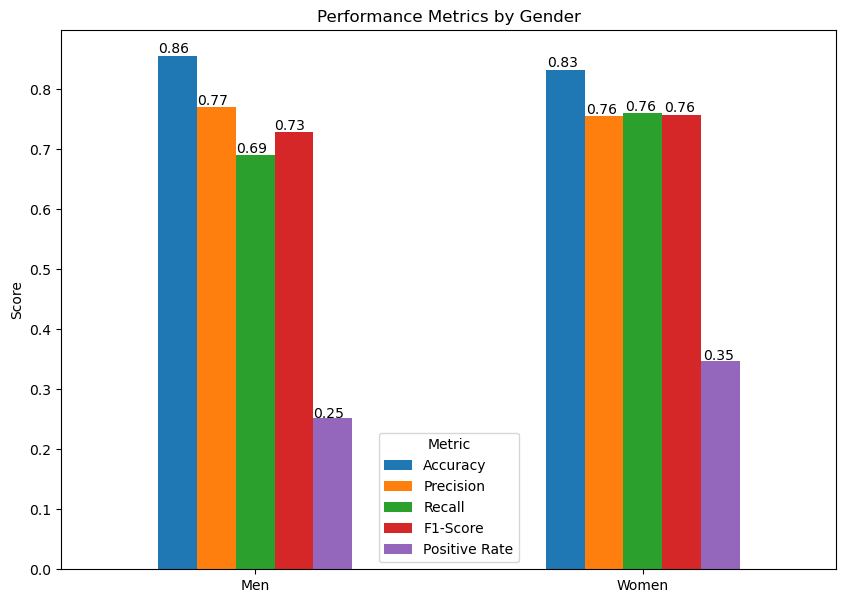

In [74]:

# Calculate performance metrics for men
metrics_men = {
    'Accuracy': accuracy_score(Y_test_men, Y_pred_rf[men_indices]),
    'Precision': precision_score(Y_test_men, Y_pred_rf[men_indices]),
    'Recall': recall_score(Y_test_men, Y_pred_rf[men_indices]),
    'F1-Score': f1_score(Y_test_men, Y_pred_rf[men_indices]),
    'Positive Rate': np.mean(Y_pred_rf[men_indices])  
}

# Calculate performance metrics for women
metrics_women = {
    'Accuracy': accuracy_score(Y_test_women, Y_pred_rf[women_indices]),
    'Precision': precision_score(Y_test_women, Y_pred_rf[women_indices]),
    'Recall': recall_score(Y_test_women, Y_pred_rf[women_indices]),
    'F1-Score': f1_score(Y_test_women, Y_pred_rf[women_indices]),
    'Positive Rate': np.mean(Y_pred_rf[women_indices])  
}

# Combine the metrics into a DataFrame for comparison
results_df = pd.DataFrame([metrics_men, metrics_women], index=['Men', 'Women'])

# Visualize the results
ax = results_df.plot(kind='bar', figsize=(10, 7))
plt.title('Performance Metrics by Gender')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metric')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

